In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [81]:
np.random.seed(1729)
data = np.random.power(2.,1000) # genero 1000 dati distribuiti come una legge di potenza

(array([  7.,   8.,   7.,  15.,  23.,  26.,  34.,  53.,  41.,  51.,  50.,
         53.,  70.,  79.,  69.,  81.,  66.,  82.,  78., 107.]),
 array([0.03187143, 0.08021822, 0.128565  , 0.17691178, 0.22525856,
        0.27360534, 0.32195212, 0.3702989 , 0.41864568, 0.46699246,
        0.51533925, 0.56368603, 0.61203281, 0.66037959, 0.70872637,
        0.75707315, 0.80541993, 0.85376671, 0.90211349, 0.95046027,
        0.99880706]),
 <a list of 20 Patch objects>)

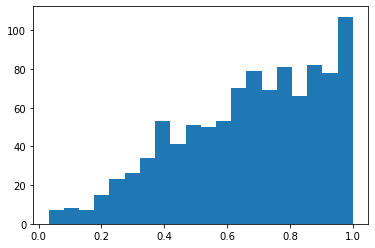

In [82]:
plt.hist(data,20)

In [83]:
d, bins = np.histogram(data,bins=20)
dx = np.zeros(20)

# devo definire un valore x per ogni valore della funzione istogramma - prendo il valore medio di ogni bin
for i in range(20):
    dx[i] = 0.5*(bins[i]+bins[i+1])

(array([  7.,   8.,   7.,  15.,  23.,  26.,  34.,  53.,  41.,  51.,  50.,
         53.,  70.,  79.,  69.,  81.,  66.,  82.,  78., 107.]),
 array([0.03187143, 0.08021822, 0.128565  , 0.17691178, 0.22525856,
        0.27360534, 0.32195212, 0.3702989 , 0.41864568, 0.46699246,
        0.51533925, 0.56368603, 0.61203281, 0.66037959, 0.70872637,
        0.75707315, 0.80541993, 0.85376671, 0.90211349, 0.95046027,
        0.99880706]),
 <a list of 20 Patch objects>)

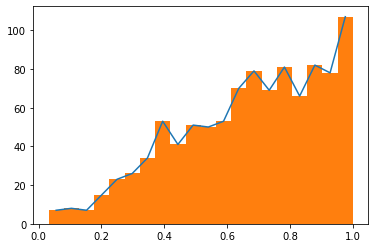

In [85]:
plt.plot(dx,d) #ho creato il plot di f(x), dove f(x) è l'istogramma
plt.hist(data,20) # giusto per farvi vedere che la f(x) è effettivamente l'istogramma

# Power law
$$ f(x) = A^{-\beta x} + c $$

In [74]:
def power_law(x,A,beta):
    return A*x**(beta-1)

In [73]:
popt, pcov = curve_fit(power_law,dx,d) # faccio il fit

In [75]:
print(pcov,popt)
print("La stima di beta è : %f pm %f" % (popt[1],np.sqrt(pcov[1,1])))

[[2.44601627e+01 3.84174515e-01]
 [3.84174515e-01 1.19771357e-02]] [92.77797072  1.94662808]
La stima di beta è : 1.946628 pm 0.109440


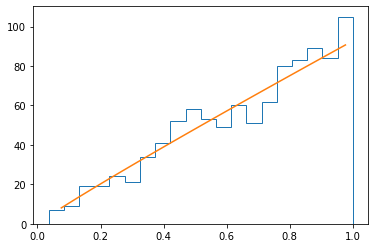

In [77]:
plt.hist(data,20,histtype='step')
plt.plot(dx, power_law(dx,popt[0],popt[1]))

# Chi-squared

$$ \chi^2 = \sum^N_{i+1}\frac{(d_i-f(x_i))^2}{\sigma_i} $$
https://en.wikipedia.org/wiki/Chi-square_distribution